In [51]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data = pd.read_csv('cleandate.csv')
data['Year'] = data['Date'].apply(lambda x: pd.Timestamp(x).strftime('%Y'))
data['Revenue'] = data['price'] * data['num_subscribers']
data = data.sort_values(by='Date')

data.head(5)

,course_id,price,num_subscribers,num_reviews,num_lectures,rating,content_duration,level,subject,paid,Date,Year,Revenue
615,8324,20,3697,195,48,0.11,3.0,1,4,1,2011-07-09,2011,73940
124,8325,20,12458,253,82,0.76,4.0,2,4,1,2011-09-09,2011,249160
316,11153,50,7014,95,62,0.54,4.5,1,4,1,2011-11-29,2011,350700
10,11475,100,26673,1090,185,0.22,12.0,1,4,1,2011-12-20,2011,2667300
2597,13216,35,119,8,52,0.96,3.5,1,3,1,2012-01-26,2012,4165


In [63]:
data = data[~data["Year"].isin(["2011"])]
data.head()

,course_id,price,num_subscribers,num_reviews,num_lectures,rating,content_duration,level,subject,paid,Date,Year,Revenue
2597,13216,35,119,8,52,0.96,3.5,1,3,1,2012-01-26,2012,4165
716,14571,50,3026,60,67,0.80,7.0,1,4,1,2012-02-28,2012,151300
803,15611,40,2634,92,25,0.78,10.0,2,2,1,2012-04-04,2012,105360
14,15285,20,25854,306,17,0.28,2.0,1,4,1,2012-04-08,2012,517080
2194,16714,20,372,21,10,0.20,0.6,3,2,1,2012-04-23,2012,7440


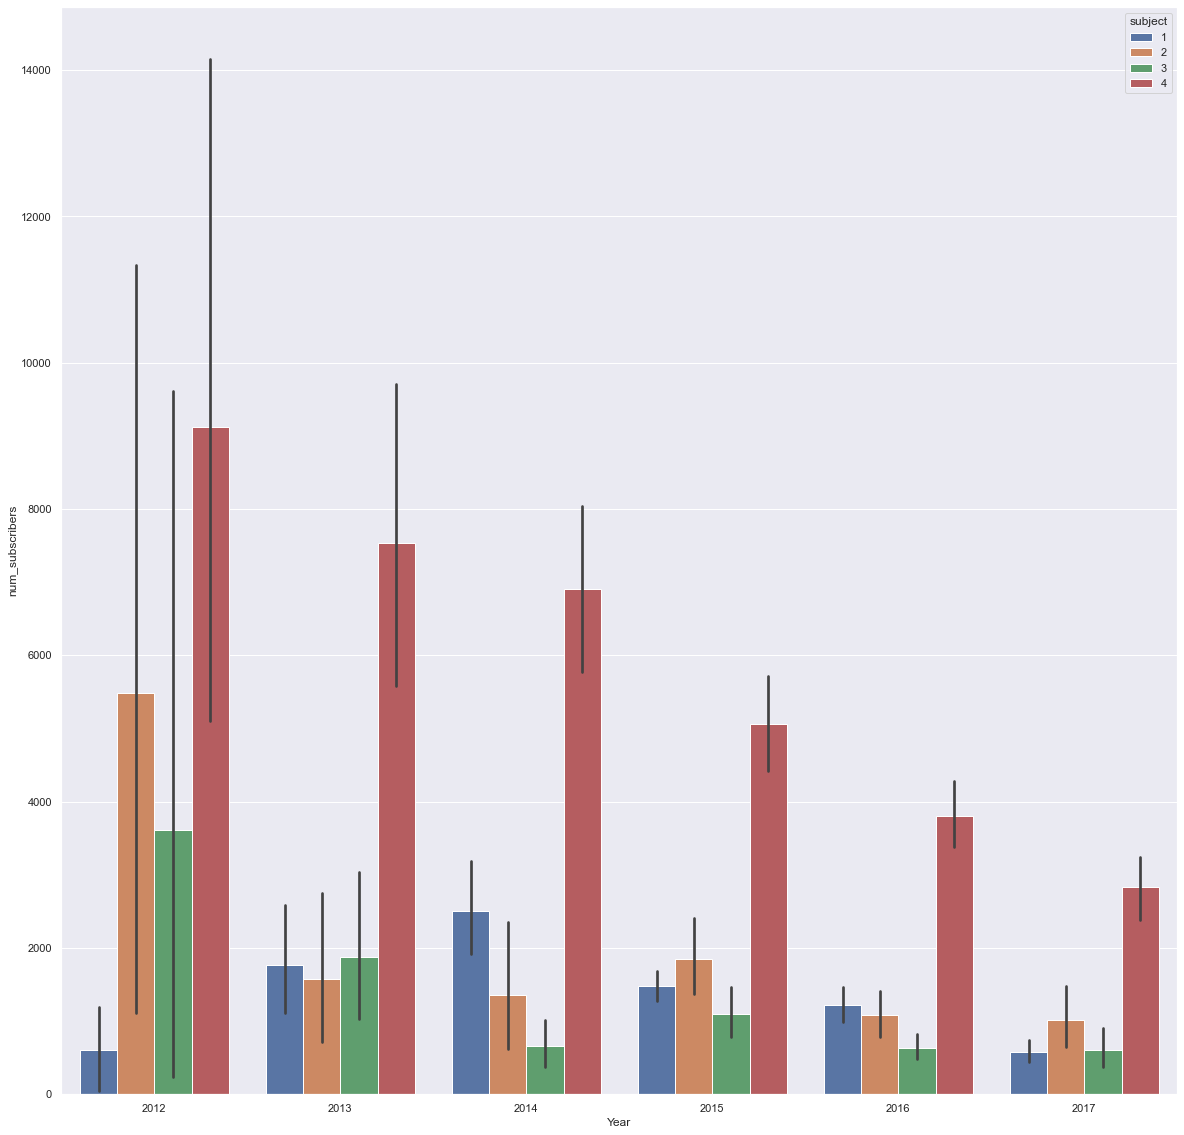

In [84]:
sns.barplot(data=data, x="Year", y="num_subscribers", hue = "subject", color="")
sns.set(rc = {'figure.figsize':(10,10)})
plt.show()

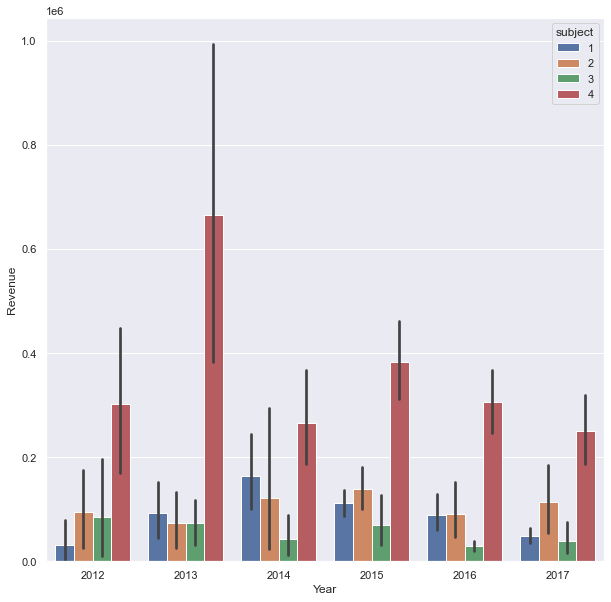

In [86]:
sns.barplot(data=data, x="Year", y="Revenue", hue = "subject")
sns.set(rc = {'figure.figsize':(20,20)})
plt.show()

In [77]:
grp = data.groupby(['Year', 'subject'])
grp.describe()

course_id                                                     \
                 count          mean            std       min         25%   
Year subject                                                                
2012 1             6.0  2.391600e+04    3330.635735   19653.0    21342.50   
     2             8.0  1.833762e+04    2573.933729   15467.0    16419.50   
     3             9.0  2.305900e+04    5478.372751   13216.0    20387.00   
     4            14.0  2.253129e+04    6084.331307   14571.0    18027.25   
2013 1            78.0  6.851592e+04   27989.659249   32908.0    43525.25   
     2            22.0  6.998227e+04   23760.150737   31150.0    53550.75   
     3            37.0  1.072023e+05  162865.592246   12214.0    55569.00   
     4            44.0  7.704691e+04   31321.961993   12975.0    56449.50   
2014 1           186.0  2.526463e+05   74329.900441   42146.0   188603.50   
     2            62.0  2.566304e+05   77233.166466  133968.0   185506.50   
     3           116.0  2.140650e+05   64178.039832   21080.0   182375.00   
     4           104.0  2.498062e+05   81968.438083   50522.0   178458.00   
2015 1           331.0  5.149296e+05  105318.021080   43291.0   434437.00   
     2           167.0  5.199205e+05   95673.925895  276680.0   440537.00   
     3           169.0  5.302222e+05  113448.314275  149716.0   455054.00   
     4           315.0  5.370558e+05  104779.305155  173888.0   457868.00   
2016 1           342.0  8.268262e+05  147959.373232   52118.0   742257.00   
     2           178.0  8.351533e+05  145957.784277   46524.0   756235.00   
     3           224.0  8.222912e+05  131761.461205  277770.0   757983.00   
     4           418.0  8.605783e+05  120858.497505  309820.0   774713.50   
2017 1           220.0  1.117757e+06  148852.941601  323916.0  1073127.50   
     2           153.0  1.140643e+06   98105.824875  628786.0  1093446.00   
     3           111.0  1.121962e+06  125003.315920  545036.0  1102416.00   
     4           218.0  1.125241e+06  101766.067625  405840.0  1075698.50   

                                                price             ... paid  \
                    50%         75%        max  count       mean  ...  75%   
Year subject                                                      ...        
2012 1          24846.0    25564.75    28172.0    6.0  42.500000  ...  1.0   
     2          17939.0    20227.75    22445.0    8.0  35.625000  ...  1.0   
     3          23683.0    26648.00    32033.0    9.0  46.111111  ...  1.0   
     4          21582.0    26537.50    32649.0   14.0  35.357143  ...  1.0   
2013 1          61949.0    83068.00   138004.0   78.0  47.115385  ...  1.0   
     2          64837.0    78814.00   121490.0   22.0  35.454545  ...  1.0   
     3          82960.0   104304.00  1052180.0   37.0  40.000000  ...  1.0   
     4          67453.5   100455.50   130694.0   44.0  82.272727  ...  1.0   
2014 1         255225.0   313349.00   381330.0  186.0  49.677419  ...  1.0   
     2         271169.0   324073.00   379814.0   62.0  36.612903  ...  1.0   
     3         210523.0   243217.00   375830.0  116.0  43.189655  ...  1.0   
     4         260796.0   317187.50   375136.0  104.0  46.875000  ...  1.0   
2015 1         521234.0   598180.00   707054.0  331.0  65.498489  ...  1.0   
     2         518870.0   600069.00   700942.0  167.0  62.904192  ...  1.0   
     3         552700.0   629704.00   701662.0  169.0  50.207101  ...  1.0   
     4         552198.0   626400.00   710486.0  315.0  71.158730  ...  1.0   
2016 1         832621.0   932409.00  1053462.0  342.0  72.894737  ...  1.0   
     2         855476.0   937787.00  1049760.0  178.0  57.724719  ...  1.0   
     3         814828.0   926752.50  1046768.0  224.0  50.870536  ...  1.0   
     4         875077.0   958595.50  1052518.0  418.0  76.375598  ...  1.0   
2017 1        1150328.0  1217971.50  1282064.0  220.0  85.818182  ...  1.0   
     2        1153326.0  1202746.00  1276020.0  153.0  64.215